# Домашнее задание 10

Построить 5 графиков по выбранным данным. 

Графики должны быть различных видов и использовать хотя бы 2 из рассмотренных на занятии библиотек. 

Для каждого описать, какого типа переменные участвуют в визуализации, какова её цель (например, посмотреть на корреляцию двух величин или на распределение значений) и почему выбрали именно такой тип графика.

# Описание датасета

Для выполнения работы использован датасет Admissions Alcohol/Drug Abuse с сайта https://data.world/

DESCRIPTION
Admissions aged 12 and older, by alcohol/drug co-abuse: Number and percent distribution, 2004-2014
SUMMARY
Table: 1.2 - Admissions aged 12 and older, by alcohol/drug co-abuse: Number and percent distribution, 2004-2014
NOTES: Based on administrative data reported to TEDS by all reporting states and jurisdictions. Percentages are based on all admissions with known and valid values.

Admissions for which values were not collected, unknown, or missing are excluded from the percentage base (denominator).

SOURCE: Center for Behavioral Health Statistics and Quality, Substance Abuse and Mental Health Services Administration, Treatment Episode Data Set (TEDS). Data received

through 02.01.16.

Citing Data

You agree to reference the recommended bibliographic citation in any of your publications that use Substance Abuse and Mental Health Services Administration (SAMHSA) data. Authors of publications that use SAMHSA data are required to send citations of their published works to SAMHSA (samhda-support@samhsa.hhs.gov) for inclusion in a database of related publications.

Data Extracted by data.world from the Treatment Episode Data Set (TEDS)

In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ada = pd.read_csv('Table 1.2.csv')

#В датасете сразу и абсолютные значения и относительные, берём только абсолтные
ada = ada[1:8]

#Одна из колонок неудачно склеяна "2008 2009", разделим её
ada['2008'] = ada['2008 2009'].str.split(' ',n = 1, expand = True)[0]
ada['2009'] = ada['2008 2009'].str.split(' ',n = 1, expand = True)[1]

#Берём только колонки со смыслом 
ada = ada[['Alcohol/drug co-abuse'] + [x for x in ada.columns if '20' in x and ' ' not in x]]

#Расплавим таблицу и преобразуем форматы данных
ada_melt = pd.melt(ada, id_vars = ['Alcohol/drug co-abuse'])

ada_melt['variable'] = ada_melt.variable.astype('int64')
ada_melt = ada_melt.sort_values('variable')

ada_melt['value'] = ada_melt['value'].str.replace(',' ,'')
ada_melt['value'] = ada_melt.value.astype('float')

ada_melt = ada_melt.set_index('variable')

ada.head()

,Alcohol/drug co-abuse,2004,2005,2006,2007,2010,2011,2012,2013,2014,2008,2009
1,Total,"1,808,469","1,895,917","1,962,674","1,974,739",NaN,"1,928,123","1,825,970","1,736,547","1,614,358","2,076,291","2,052,174"
2,Drug primary,"1,028,889","1,105,882","1,138,362","1,124,563",NaN,"1,146,460","1,092,902","1,067,529","1,002,589","1,176,089","1,164,760"
3,Drug only,"634,153","696,476","731,927","726,032","760,700","801,668","776,820","783,162","749,904","774,474","777,361"
4,Drug w/secondary alcohol,"394,736","409,406","406,435","398,531","359,468","344,792","316,082","284,367","252,685","401,615","387,399"
5,Alcohol primary,"729,366","746,057","780,815","806,323","781,692","756,533","707,863","647,989","585,024","860,427","855,294"


# 1. Динамика alcohol/drug co-abuse по годам

Описание

Тип переменной: числовая (value - количество человек), числовая (variable - год). <br/>
Цель: оценка изменения общей зависимости в динамике по годам.  <br/>
Тип графика: линейный график с одним показателем наилучшим образом подходит для задач, связанных с динамикой показателей.

In [114]:
ada_melt_total = ada_melt[ada_melt['Alcohol/drug co-abuse'] == 'Total']

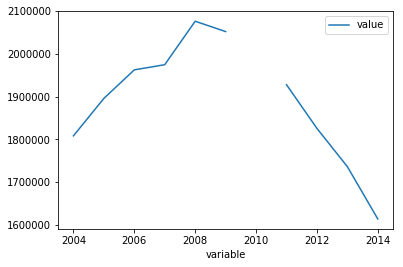

In [123]:
ada_melt_total.plot()

__Вывод:__ динамика alcohol/drug co-abuse имела нарастающий тренд с 2004 по 2008 год, после этого количество зависимых пошло на спад

# 2. Сравнение суммарных показателей для alcohol и drug в динамике

Описание

Тип переменной: числовая (value - количество человек), категориальная (Alcohol/drug co-abuse - категория зависимости), числовая (variable - год). <br/>
Цель: оценка структуры зависимости по годам.  <br/>
Тип графика: столбчатый график с накоплением - показывает соотношение n-категорий в каждый выбранный период.

In [160]:
ada_melt_compare = ada_melt[ada_melt['Alcohol/drug co-abuse'] != 'Total']
ada_melt_compare['Alcohol/drug co-abuse'][ada_melt_compare['Alcohol/drug co-abuse'] == 'Drug primary'] = 'Drug'
ada_melt_compare['Alcohol/drug co-abuse'][ada_melt_compare['Alcohol/drug co-abuse'] == 'Drug only'] = 'Drug'
ada_melt_compare['Alcohol/drug co-abuse'][ada_melt_compare['Alcohol/drug co-abuse'] == 'Drug w/secondary alcohol'] = 'Drug'
ada_melt_compare['Alcohol/drug co-abuse'][ada_melt_compare['Alcohol/drug co-abuse'] == 'Alcohol primary'] = 'Alcohol'
ada_melt_compare['Alcohol/drug co-abuse'][ada_melt_compare['Alcohol/drug co-abuse'] == 'Alcohol only'] = 'Alcohol'
ada_melt_compare['Alcohol/drug co-abuse'][ada_melt_compare['Alcohol/drug co-abuse'] == 'Alcohol w/secondary drug'] = 'Alcohol'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5984: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2910: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\ProgramData\Anaconda3\lib\site-packages\ipyke

In [169]:
ada_melt_compare = ada_melt_compare.reset_index().groupby(['variable','Alcohol/drug co-abuse']).sum()

In [180]:
ada_melt_compare = ada_melt_compare.pivot_table(index='variable', 
                             columns = 'Alcohol/drug co-abuse',
                            values = 'value')

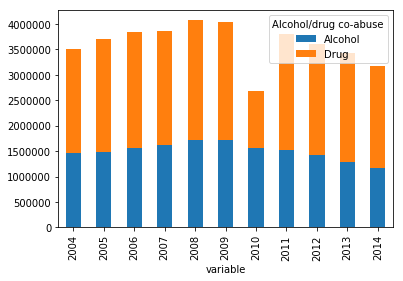

In [183]:
ada_melt_compare.plot(kind='bar', stacked=True)

__Вывод:__ исключая 2010 год, в целом, струтура зависимостей alcohol и drug приблизительно одинакова.

# 3. Сравнение детальных показателей для alcohol и drug за 10 лет

Описание

Тип переменной: числовая (value - количество человек), категориальная (Alcohol/drug co-abuse - категория зависимости). <br/>
Цель: оценка соотношения разных категорий зависимости за период.  <brЭ/>
Тип графика: боксплот - один из лучших видов графиков, когда надо проанализировать вариативность признака.

In [209]:
ada_melt_total_compare = ada_melt[ada_melt['Alcohol/drug co-abuse'] != 'Total']

[None, None, None, None, None, None, None, None, None, None, None, None]

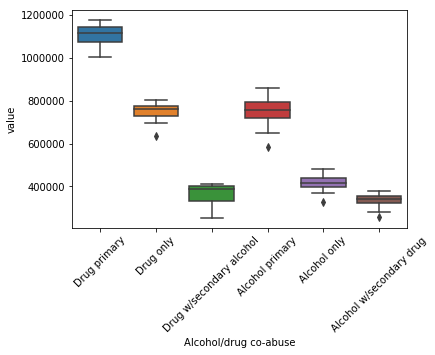

In [217]:
bx = sns.boxplot(x='Alcohol/drug co-abuse', y='value', data = ada_melt_total_compare)
plt.setp(bx.get_xticklabels(), rotation=45)

__Вывод:__ судя по данным за 10 лет видно, что преимущественными видами зависимость являюются drug и совместные drag с alcohol

# 4. Корреляция abuse

Описание

Тип переменной: числовая (value - количество человек), категориальная (Alcohol/drug co-abuse - категория зависимости). <br/>
Цель: оценка взаимосвязи показателей за выбранный период.  <br/>
Тип графика: пэйр плот, позволяет оценить распределение каждого признака (на диагонали) и их взамосвязь (вне диагонали).

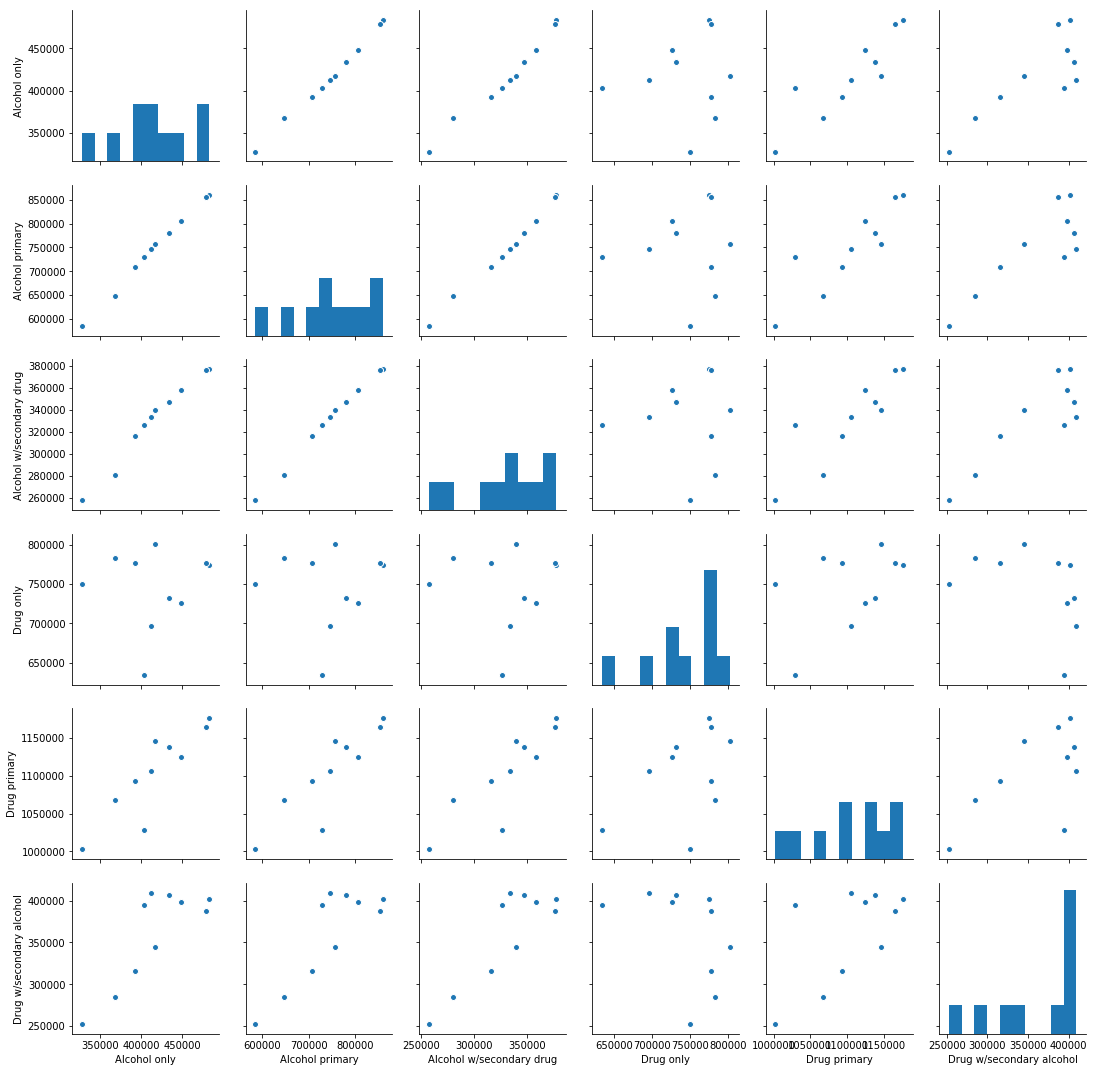

In [226]:
ada_melt_cor = ada_melt[ada_melt['Alcohol/drug co-abuse'] != 'Total']
ada_melt_cor = ada_melt_cor.pivot_table(index='variable', 
                             columns = 'Alcohol/drug co-abuse',
                            values = 'value')

ada_melt_cor = ada_melt_cor.dropna() #выкидываем пропуски

sns_plot = sns.pairplot(ada_melt_cor)
sns_plot

 __Вывод:__ априори производные категории alcohol и drug имеют линейные корреляции, что видно на графиках и понятно без этого. Больший интерес представляют совместные корреляции alcohol и drug. Судя по графикам для нижнего левого сектора (drug vs alcohol) также можно простройти апроксмирующую линейную зависимость линию

# 5. Оценка наибольшей, по количесту людей, категории зависимости в динамике по годам

Описание

Тип переменной: числовая (value - количество человек), категориальная (Alcohol/drug co-abuse - категория зависимости), числовая (variable - год). <br/>. 
Цель: детальный анализ зависимости между годом и категорией abuse. <br/>.
Тип графика: хитмап - позволяет выявить "очаги" значения по параметрам.

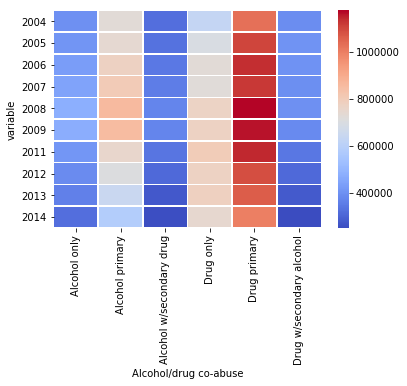

In [232]:
sns.heatmap(ada_melt_cor, linewidths=0.5, cmap='coolwarm')

 __Вывод:__ наиболее сильная зависимость это Drug primary, пик которой приходился на 2008 - 2009 год.